# This is a Notebook for a Time Series Deep Learning Model for Energy Forecast

## The dataset is collected from an open source online, representing a steel factory's energy readings

## The first step is to explore the dataset
## The second step is to pre-process the data
## The third step is to develop the model

### Data Exploration:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime 

import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from IPython.core.interactiveshell import InteractiveShell
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense




C:\Users\hasan\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Set the random seed for reproducibility of results

rand_state = 1000

# Configure pandas to display all columns when printing dataframes

pd.set_option('display.max_columns', None)

In [4]:
# Set the level of interactivity for the IPython shell to 'all', 
# which allows all expressions in a cell to be evaluated and their results displayed

InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Read the CSV file containing the dataset

df1 = pd.read_csv('First_Dataset_Steel_Industry_data.csv')

In [6]:
# Display the data frame

df1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [7]:
# Check the shape of the data frame

df1.shape

(35040, 11)

In [8]:
# Check the attributes of the data frame

df1.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [9]:
# Get more information about the attributes

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [10]:
# Convert the date column to datetime data type

df1['date'] = pd.to_datetime(df1['date'])
df1

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [11]:
# Check the data types

df1.dtypes

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

In [12]:
# Drop some columns that will not be used in the model

cols_to_drop=['Lagging_Current_Reactive.Power_kVarh','Leading_Current_Reactive_Power_kVarh','CO2(tCO2)'
              ,'Lagging_Current_Power_Factor','Leading_Current_Power_Factor','NSM','WeekStatus'
              ,'Day_of_week','Load_Type']

df1_short = df1.drop(cols_to_drop,axis=1, inplace=False)

df1_short.set_index('date', inplace=True)

df1_short

,Usage_kWh
date,
2018-01-01 00:15:00,3.17
2018-01-01 00:30:00,4.00
2018-01-01 00:45:00,3.24
2018-01-01 01:00:00,3.31
2018-01-01 01:15:00,3.82
...,...
2018-12-31 23:00:00,3.85
2018-12-31 23:15:00,3.74
2018-12-31 23:30:00,3.78


In [13]:
df1_short.dtypes

Usage_kWh    float64
dtype: object

'\nCreating a plot to see the energy usage along the full time period of the data set\n\n'

<AxesSubplot:title={'center':'Energy_Usage'}, xlabel='date'>

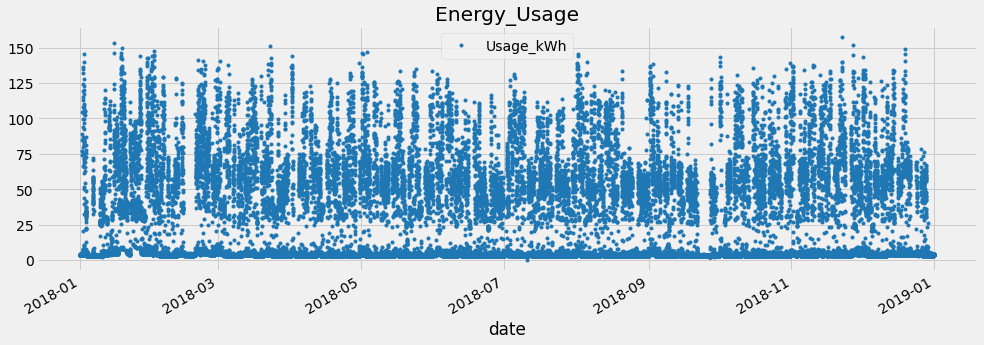

In [14]:
"""
Creating a plot to see the energy usage along the full time period of the data set

"""

df1_short.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='Energy_Usage')
plt.show()

<AxesSubplot:title={'center':'Data Train/Test Split'}, xlabel='date'>

<AxesSubplot:title={'center':'Data Train/Test Split'}, xlabel='date'>

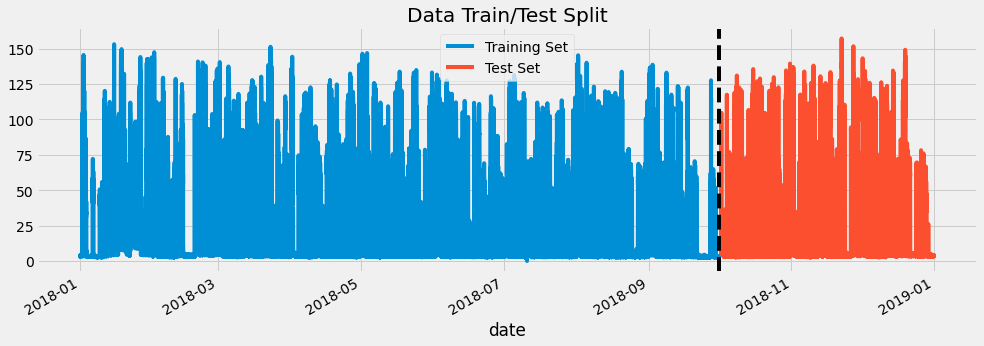

In [15]:
train = df1_short.loc[df1_short.index < '10-01-2018']  # Assigning the training set
test = df1_short.loc[df1_short.index >= '10-02-2018']  # Assigning the testing set

# Show the data in terms of training and testing sets

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('10-01-2018', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

<AxesSubplot:title={'center':'Week Of Energy Usage'}, xlabel='date'>

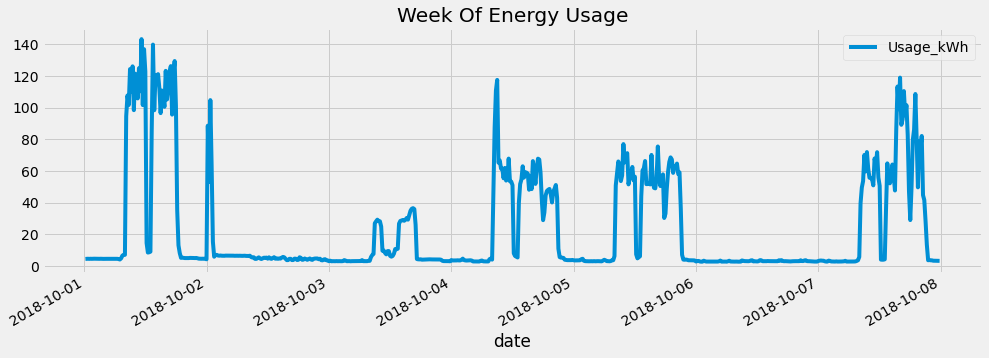

In [16]:
# This shows an example of a week of data

df1_short.loc[(df1_short.index > '10-01-2018') & (df1_short.index < '10-08-2018')] \
    .plot(figsize=(15, 5), title='Week Of Energy Usage')
plt.show()

In [17]:
"""
Creating the features that will be used to improve the model's accuracy

"""

def create_features(df1_short):
    """
    Create time series features based on time series index.
    """
    df1_short = df1_short.copy()
    df1_short['minute'] = df1_short.index.minute  # Add minute feature
    df1_short['hour'] = df1_short.index.hour
    df1_short['dayofweek'] = df1_short.index.dayofweek
    df1_short['quarter'] = df1_short.index.quarter
    df1_short['month'] = df1_short.index.month
    df1_short['year'] = df1_short.index.year
    df1_short['dayofyear'] = df1_short.index.dayofyear
    df1_short['dayofmonth'] = df1_short.index.day
    df1_short['weekofyear'] = df1_short.index.isocalendar().week
    return df1_short

df1_short = create_features(df1_short)

"\nCreating the features that will be used to improve the model's accuracy\n\n"

<AxesSubplot:xlabel='month', ylabel='Usage_kWh'>

Text(0.5, 1.0, 'Energy Consumption by Month')

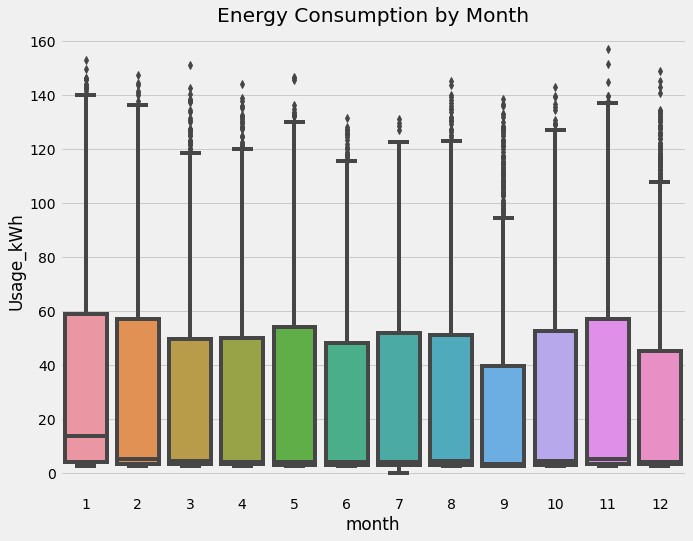

In [18]:
# A box plot showing the sales performance from the historical data, on a yearly basis

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1_short, x='month', y='Usage_kWh')
ax.set_title('Energy Consumption by Month')
plt.show()

### Convolutional Neural Network (CNN)

In [20]:
"""
Training and testing the model using the features that were created earlier

"""

train = create_features(train)
test = create_features(test)

FEATURES = ['minute', 'hour']
TARGET = 'Usage_kWh'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

'\nTraining and testing the model using the features that were created earlier\n\n'

In [21]:
# Reshape the data for CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

In [22]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')


In [23]:
# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
819/819 [==============================] - 3s 3ms/step - loss: 1070.3610
Epoch 2/50
819/819 [==============================] - 2s 3ms/step - loss: 1016.5840
Epoch 3/50
819/819 [==============================] - 4s 5ms/step - loss: 982.2046
Epoch 4/50
819/819 [==============================] - 6s 7ms/step - loss: 913.2640
Epoch 5/50
819/819 [==============================] - 4s 5ms/step - loss: 846.0214
Epoch 6/50
819/819 [==============================] - 2s 3ms/step - loss: 810.9370
Epoch 7/50
819/819 [==============================] - 4s 5ms/step - loss: 790.7205
Epoch 8/50
819/819 [==============================] - 4s 5ms/step - loss: 783.0497
Epoch 9/50
819/819 [==============================] - 4s 5ms/step - loss: 775.1216
Epoch 10/50
819/819 [==============================] - 4s 4ms/step - loss: 765.4088
Epoch 11/50
819/819 [==============================] - 4s 5ms/step - loss: 759.6804
Epoch 12/50
819/819 [==============================] - 6s 8ms/step - loss: 757.8607

In [24]:
# Evaluate the model
y_pred_cnn = cnn_model.predict(X_test_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)

273/273 [==============================] - 1s 2ms/step


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (CNN)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

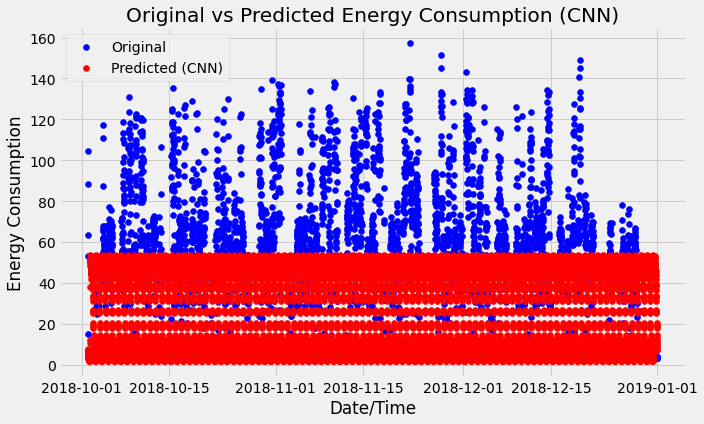

In [25]:
# Plotting the original and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Original')
plt.scatter(X_test.index, y_pred_cnn, color='red', label='Predicted (CNN)')
plt.title('Original vs Predicted Energy Consumption (CNN)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

### Recurrent Neural Network (RNN)

In [26]:
# Define RNN model
rnn_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1)
])

In [27]:
# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')


In [28]:
# Reshape the data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [29]:
# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
819/819 [==============================] - 10s 9ms/step - loss: 1107.4875
Epoch 2/50
819/819 [==============================] - 5s 6ms/step - loss: 865.2879
Epoch 3/50
819/819 [==============================] - 7s 9ms/step - loss: 801.7009
Epoch 4/50
819/819 [==============================] - 5s 6ms/step - loss: 781.9913
Epoch 5/50
819/819 [==============================] - 6s 7ms/step - loss: 770.5746
Epoch 6/50
819/819 [==============================] - 7s 9ms/step - loss: 767.1897
Epoch 7/50
819/819 [==============================] - 4s 5ms/step - loss: 761.5006
Epoch 8/50
819/819 [==============================] - 6s 8ms/step - loss: 759.1680
Epoch 9/50
819/819 [==============================] - 6s 8ms/step - loss: 756.1625
Epoch 10/50
819/819 [==============================] - 2s 3ms/step - loss: 756.4017
Epoch 11/50
819/819 [==============================] - 8s 10ms/step - loss: 752.1768
Epoch 12/50
819/819 [==============================] - 5s 6ms/step - loss: 750.726

In [30]:
# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test_rnn)
mse_rnn = mean_squared_error(y_test, y_pred_rnn)

273/273 [==============================] - 1s 2ms/step


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (RNN)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

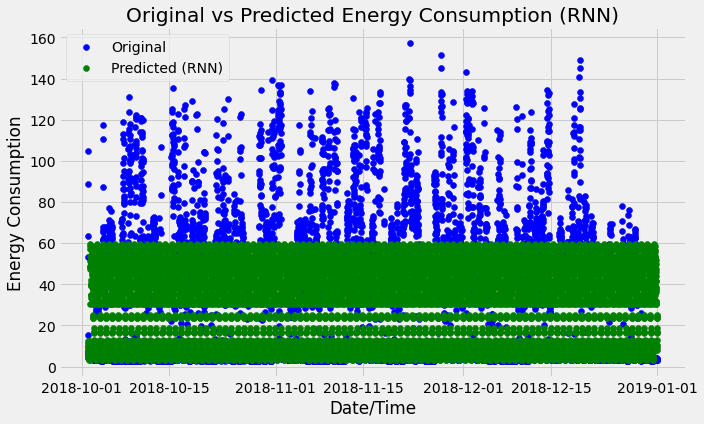

In [31]:
# Plotting the original and predicted values for RNN model
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Original')
plt.scatter(X_test.index, y_pred_rnn, color='green', label='Predicted (RNN)')
plt.title('Original vs Predicted Energy Consumption (RNN)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

### Multi-Layer Perceptron (MLP)

In [32]:
# Define MLP model
mlp_model = Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1]),
    Dense(50, activation='relu'),
    Dense(1)
])


In [33]:
# Compile the model
mlp_model.compile(optimizer='adam', loss='mse')


In [34]:
# Train the model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
819/819 [==============================] - 4s 2ms/step - loss: 1051.8210
Epoch 2/50
819/819 [==============================] - 2s 2ms/step - loss: 1005.8933
Epoch 3/50
819/819 [==============================] - 2s 2ms/step - loss: 968.4818
Epoch 4/50
819/819 [==============================] - 2s 2ms/step - loss: 926.2518
Epoch 5/50
819/819 [==============================] - 2s 2ms/step - loss: 880.8787
Epoch 6/50
819/819 [==============================] - 2s 2ms/step - loss: 842.3348
Epoch 7/50
819/819 [==============================] - 2s 2ms/step - loss: 816.4970
Epoch 8/50
819/819 [==============================] - 3s 4ms/step - loss: 799.9341
Epoch 9/50
819/819 [==============================] - 3s 4ms/step - loss: 784.3187
Epoch 10/50
819/819 [==============================] - 5s 6ms/step - loss: 774.3040
Epoch 11/50
819/819 [==============================] - 6s 7ms/step - loss: 770.1138
Epoch 12/50
819/819 [==============================] - 2s 3ms/step - loss: 766.0991

In [35]:
# Evaluate the model
y_pred_mlp = mlp_model.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

273/273 [==============================] - 1s 2ms/step


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (MLP)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

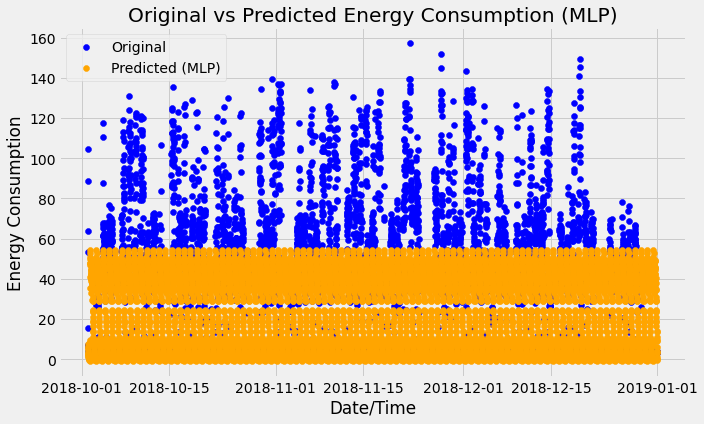

In [36]:
# Plotting the original and predicted values for MLP model
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Original')
plt.scatter(X_test.index, y_pred_mlp, color='orange', label='Predicted (MLP)')
plt.title('Original vs Predicted Energy Consumption (MLP)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

### Comparison of the Models' Performance

In [37]:
# RMSE calculation
rmse_cnn = np.sqrt(mse_cnn)
rmse_rnn = np.sqrt(mse_rnn)
rmse_mlp = np.sqrt(mse_mlp)

In [38]:
# Calculate MSE and RMSE for CNN model
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)

# Calculate MSE and RMSE for RNN model
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)

# Calculate MSE and RMSE for MLP model
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
rmse_mlp = np.sqrt(mse_mlp)

In [39]:
# Print MSE and RMSE for each model
print("CNN MSE:", mse_cnn, " RMSE:", rmse_cnn)
print("RNN MSE:", mse_rnn, " RMSE:", rmse_rnn)
print("MLP MSE:", mse_mlp, " RMSE:", rmse_mlp)

CNN MSE: 674.933104234836  RMSE: 25.979474672033614
RNN MSE: 673.5264717517422  RMSE: 25.95238855581008
MLP MSE: 696.0719507207278  RMSE: 26.38317552382063


In [40]:
# Convert predicted values to integers for accuracy calculation
y_pred_cnn_rounded = np.round(y_pred_cnn)
y_pred_rnn_rounded = np.round(y_pred_rnn)
y_pred_mlp_rounded = np.round(y_pred_mlp)

# Calculate accuracy for each model
accuracy_cnn = accuracy_score(np.round(y_test), y_pred_cnn_rounded)
accuracy_rnn = accuracy_score(np.round(y_test), y_pred_rnn_rounded)
accuracy_mlp = accuracy_score(np.round(y_test), y_pred_mlp_rounded)

# Print MSE, RMSE, and accuracy for each model
print("CNN MSE:", mse_cnn, " RMSE:", rmse_cnn, " Accuracy:", accuracy_cnn)
print("RNN MSE:", mse_rnn, " RMSE:", rmse_rnn, " Accuracy:", accuracy_rnn)
print("MLP MSE:", mse_mlp, " RMSE:", rmse_mlp, " Accuracy:", accuracy_mlp)

CNN MSE: 674.933104234836  RMSE: 25.979474672033614  Accuracy: 0.06753663003663003
RNN MSE: 673.5264717517422  RMSE: 25.95238855581008  Accuracy: 0.034340659340659344
MLP MSE: 696.0719507207278  RMSE: 26.38317552382063  Accuracy: 0.03777472527472527


### Improve model performance

In [41]:
# Generate predictions from each model
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_mlp = mlp_model.predict(X_test)

# Combine predictions using averaging
y_pred_ensemble = (y_pred_cnn + y_pred_rnn + y_pred_mlp) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)

# Print MSE and RMSE for the ensemble model
print("Ensemble MSE:", mse_ensemble, " RMSE:", rmse_ensemble)

# Calculate accuracy for the ensemble model
y_pred_ensemble_rounded = np.round(y_pred_ensemble)
accuracy_ensemble = accuracy_score(np.round(y_test), y_pred_ensemble_rounded)

# Print MSE, RMSE, and accuracy for the ensemble model
print("Ensemble MSE:", mse_ensemble, " RMSE:", rmse_ensemble, " Accuracy:", accuracy_ensemble)


273/273 [==============================] - 1s 2ms/step
Ensemble MSE: 668.1692116776351  RMSE: 25.848969257547488
Ensemble MSE: 668.1692116776351  RMSE: 25.848969257547488  Accuracy: 0.11092032967032966


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Ensemble)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

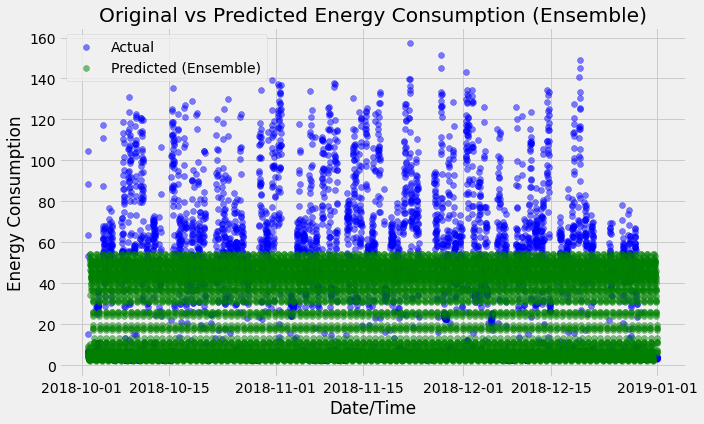

In [42]:
# Plotting the actual and ensemble predicted values as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_ensemble, color='green', label='Predicted (Ensemble)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Ensemble)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Ensemble)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

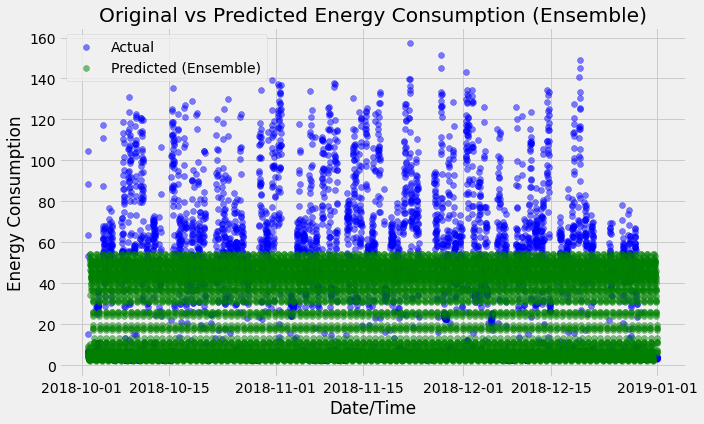

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'One Week of Actual vs Predicted Energy Consumption (Ensemble)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

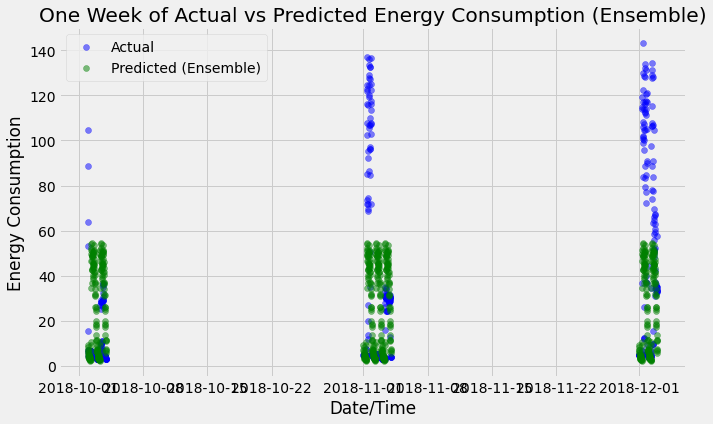

In [44]:
# Plotting the actual and ensemble predicted values as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_ensemble, color='green', label='Predicted (Ensemble)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Ensemble)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# Plotting a week of actual vs predicted values as a scatter plot
plt.figure(figsize=(10, 6))
start_index = 0  # Set the start index of the week
end_index = start_index + 7 * 24 * 4  # Assuming data is collected at 15-minute intervals
plt.scatter(y_test.index[start_index:end_index], y_test[start_index:end_index], color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index[start_index:end_index], y_pred_ensemble[start_index:end_index], color='green', label='Predicted (Ensemble)', alpha=0.5)
plt.title('One Week of Actual vs Predicted Energy Consumption (Ensemble)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [ ]:
# Define a function to create CNN model
def create_cnn_model(filters=64, kernel_size=2, dense_units=50):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
        Flatten(),
        Dense(dense_units, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model in a scikit-learn compatible wrapper
cnn_regressor = KerasRegressor(build_fn=create_cnn_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'filters': [8, 16, 32, 64, 128],
    'kernel_size': [2, 3, 4, 5, 6],
    'dense_units': [50, 100, 150, 200, 250]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=cnn_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X_train_cnn, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [46]:
# Get the best parameters found during grid search
best_params = grid_result.best_params_

# Create a CNN model with the best parameters
best_cnn_model = create_cnn_model(filters=best_params['filters'], kernel_size=best_params['kernel_size'], dense_units=best_params['dense_units'])

# Train the model with the best parameters
best_cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on test data
y_pred_best_cnn = best_cnn_model.predict(X_test_cnn)
mse_best_cnn = mean_squared_error(y_test, y_pred_best_cnn)
rmse_best_cnn = np.sqrt(mse_best_cnn)

# Print the performance of the best CNN model
print("Best CNN Model Performance:")
print("MSE:", mse_best_cnn)
print("RMSE:", rmse_best_cnn)


Epoch 1/50
819/819 [==============================] - 8s 8ms/step - loss: 1051.1907
Epoch 2/50
819/819 [==============================] - 7s 8ms/step - loss: 988.2079
Epoch 3/50
819/819 [==============================] - 2s 3ms/step - loss: 921.6875
Epoch 4/50
819/819 [==============================] - 7s 9ms/step - loss: 851.4851
Epoch 5/50
819/819 [==============================] - 5s 7ms/step - loss: 806.1542
Epoch 6/50
819/819 [==============================] - 2s 3ms/step - loss: 783.1415
Epoch 7/50
819/819 [==============================] - 7s 9ms/step - loss: 768.6984
Epoch 8/50
819/819 [==============================] - 7s 8ms/step - loss: 759.9135
Epoch 9/50
819/819 [==============================] - 2s 3ms/step - loss: 754.6485
Epoch 10/50
819/819 [==============================] - 6s 8ms/step - loss: 751.7763
Epoch 11/50
819/819 [==============================] - 6s 8ms/step - loss: 747.2298
Epoch 12/50
819/819 [==============================] - 2s 3ms/step - loss: 744.0977


273/273 [==============================] - 1s 2ms/step
Best CNN Model Performance:
MSE: 674.0514047933995
RMSE: 25.96249997194799


In [47]:
# Calculate Mean Absolute Error (MAE)
mae_best_cnn = mean_absolute_error(y_test, y_pred_best_cnn)

# Calculate R-squared (R2) score
r2_best_cnn = r2_score(y_test, y_pred_best_cnn)

# Print the performance metrics of the best CNN model
print("Best CNN Model Performance:")
print("MSE:", mse_best_cnn)
print("RMSE:", rmse_best_cnn)
print("MAE:", mae_best_cnn)
print("R2 Score:", r2_best_cnn)

Best CNN Model Performance:
MSE: 674.0514047933995
RMSE: 25.96249997194799
MAE: 17.4356997269654
R2 Score: 0.404572512074163


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Best CNN Model)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

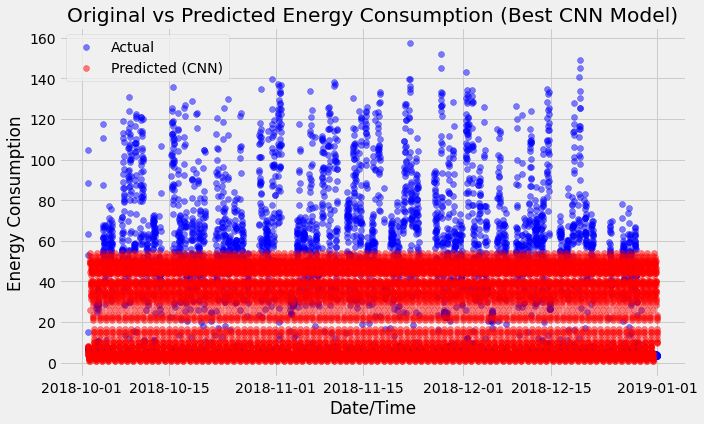

In [48]:
# Plotting the original and predicted values for the best CNN model as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_best_cnn, color='red', label='Predicted (CNN)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Best CNN Model)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [50]:
# Define a function to create RNN model
def create_rnn_model(units=50):
    model = Sequential([
        LSTM(units=units, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model in a scikit-learn compatible wrapper
rnn_regressor = KerasRegressor(build_fn=create_rnn_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'units': [50, 100, 150, 200]  # You may adjust this grid based on your requirements
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rnn_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X_train_rnn, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\hasan\AppData\Local\Temp/ipykernel_21652/1932585053.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  rnn_regressor = KerasRegressor(build_fn=create_rnn_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...........................................units=50; total time=   2.9s
[CV] END ...........................................units=50; total time=   2.6s
[CV] END ...........................................units=50; total time=   2.4s
[CV] END ..........................................units=100; total time=   2.9s
[CV] END ..........................................units=100; total time=   2.8s
[CV] END ..........................................units=100; total time=   2.9s
[CV] END ..........................................units=150; total time=   3.4s
[CV] END ..........................................units=150; total time=   3.9s
[CV] END ..........................................units=150; total time=   3.9s
[CV] END ..........................................units=200; total time=   5.9s
[CV] END ..........................................units=200; total time=   4.8s
[CV] END ........................................

In [51]:
# Get the best parameters found during grid search
best_params = grid_result.best_params_

# Create an RNN model with the best parameters
best_rnn_model = create_rnn_model(units=best_params['units'])

# Train the model with the best parameters
best_rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on test data
y_pred_best_rnn = best_rnn_model.predict(X_test_rnn)
mse_best_rnn = mean_squared_error(y_test, y_pred_best_rnn)
rmse_best_rnn = np.sqrt(mse_best_rnn)

# Print the performance of the best RNN model
print("Best RNN Model Performance:")
print("MSE:", mse_best_rnn)
print("RMSE:", rmse_best_rnn)


Epoch 1/50
819/819 [==============================] - 3s 2ms/step - loss: 1075.5557
Epoch 2/50
819/819 [==============================] - 2s 2ms/step - loss: 871.3316
Epoch 3/50
819/819 [==============================] - 2s 2ms/step - loss: 818.7839
Epoch 4/50
819/819 [==============================] - 2s 2ms/step - loss: 788.6364
Epoch 5/50
819/819 [==============================] - 2s 2ms/step - loss: 777.1906
Epoch 6/50
819/819 [==============================] - 1s 2ms/step - loss: 769.7617
Epoch 7/50
819/819 [==============================] - 2s 2ms/step - loss: 763.2964
Epoch 8/50
819/819 [==============================] - 1s 2ms/step - loss: 759.5764
Epoch 9/50
819/819 [==============================] - 2s 3ms/step - loss: 758.0314
Epoch 10/50
819/819 [==============================] - 2s 2ms/step - loss: 755.4650
Epoch 11/50
819/819 [==============================] - 2s 3ms/step - loss: 749.5970
Epoch 12/50
819/819 [==============================] - 2s 3ms/step - loss: 747.0820


273/273 [==============================] - 1s 1ms/step
Best RNN Model Performance:
MSE: 658.5192044125978
RMSE: 25.661629028816503


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Best RNN Model)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

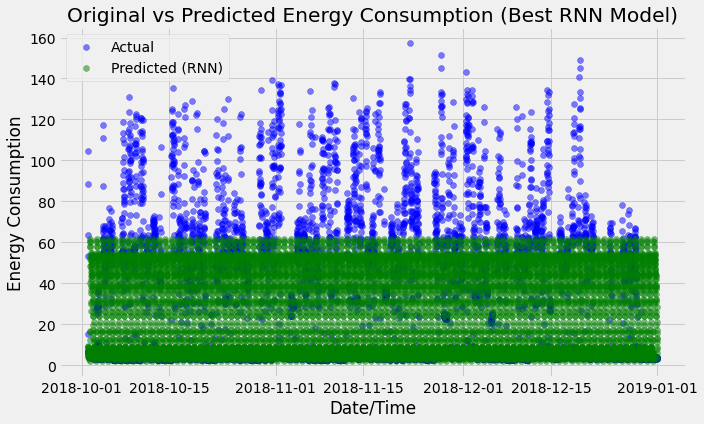

In [53]:
# Plotting the original and predicted values for the best RNN model as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_best_rnn, color='green', label='Predicted (RNN)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Best RNN Model)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [56]:
# Define a function to create MLP model
def create_mlp_model(hidden_units=50, hidden_layers=1):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Wrap the Keras model in a scikit-learn compatible wrapper
mlp_regressor = KerasRegressor(build_fn=create_mlp_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'hidden_units': [50, 100, 150, 200],
    'hidden_layers': [1, 2, 3]  # You can adjust this based on the number of hidden layers you want to try
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid_search.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


C:\Users\hasan\AppData\Local\Temp/ipykernel_21652/1959599486.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_regressor = KerasRegressor(build_fn=create_mlp_model, verbose=0)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...................hidden_layers=1, hidden_units=50; total time=   1.3s
[CV] END ...................hidden_layers=1, hidden_units=50; total time=   1.3s
[CV] END ...................hidden_layers=1, hidden_units=50; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=100; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=100; total time=   1.3s
[CV] END ..................hidden_layers=1, hidden_units=100; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=150; total time=   1.6s
[CV] END ..................hidden_layers=1, hidden_units=150; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=150; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=200; total time=   1.2s
[CV] END ..................hidden_layers=1, hidden_units=200; total time=   1.2s
[CV] END ..................hidden_layers=1, hidd

In [59]:
# Get the best parameters found during grid search
best_params = grid_result.best_params_

# Create an MLP model with the best parameters
best_mlp_model = create_mlp_model(hidden_units=best_params['hidden_units'], hidden_layers=best_params['hidden_layers'])

# Train the model with the best parameters
best_mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on test data
y_pred_best_mlp = best_mlp_model.predict(X_test)
mse_best_mlp = mean_squared_error(y_test, y_pred_best_mlp)
rmse_best_mlp = np.sqrt(mse_best_mlp)

# Print the performance of the best MLP model
print("Best MLP Model Performance:")
print("MSE:", mse_best_mlp)
print("RMSE:", rmse_best_mlp)


Epoch 1/50
819/819 [==============================] - 2s 2ms/step - loss: 1045.7163
Epoch 2/50
819/819 [==============================] - 1s 2ms/step - loss: 989.8341
Epoch 3/50
819/819 [==============================] - 1s 2ms/step - loss: 870.9390
Epoch 4/50
819/819 [==============================] - 1s 2ms/step - loss: 770.6290
Epoch 5/50
819/819 [==============================] - 1s 2ms/step - loss: 759.2903
Epoch 6/50
819/819 [==============================] - 1s 2ms/step - loss: 747.6017
Epoch 7/50
819/819 [==============================] - 1s 2ms/step - loss: 742.4811
Epoch 8/50
819/819 [==============================] - 1s 2ms/step - loss: 737.0049
Epoch 9/50
819/819 [==============================] - 1s 2ms/step - loss: 734.4849
Epoch 10/50
819/819 [==============================] - 1s 2ms/step - loss: 730.5830
Epoch 11/50
819/819 [==============================] - 1s 2ms/step - loss: 723.3585
Epoch 12/50
819/819 [==============================] - 1s 1ms/step - loss: 719.8884


273/273 [==============================] - 0s 1ms/step
Best MLP Model Performance:
MSE: 606.2380526473503
RMSE: 24.621901889321027


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Best MLP Model)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

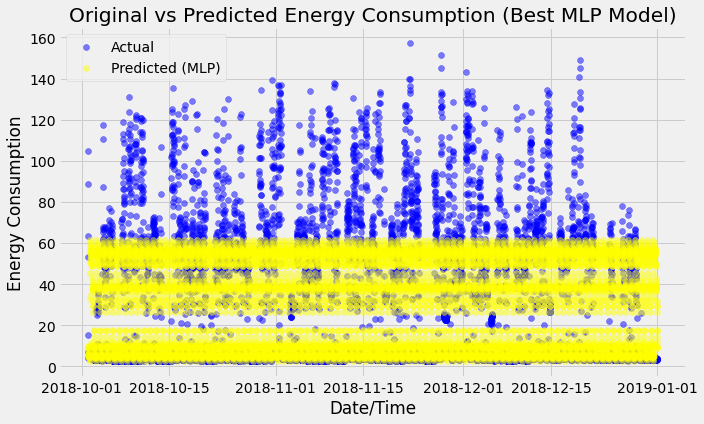

In [60]:
# Plotting the original and predicted values for the best MLP model as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_best_mlp, color='yellow', label='Predicted (MLP)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Best MLP Model)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [61]:
# Combine predictions from CNN, RNN, and MLP models
y_pred_ensemble = (y_pred_best_cnn + y_pred_best_rnn + y_pred_best_mlp) / 3

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)

# Print the performance of the ensemble model
print("Ensemble Model Performance:")
print("MSE:", mse_ensemble)
print("RMSE:", rmse_ensemble)


Ensemble Model Performance:
MSE: 626.2782344130844
RMSE: 25.02555163054522


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'Original vs Predicted Energy Consumption (Ensemble)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

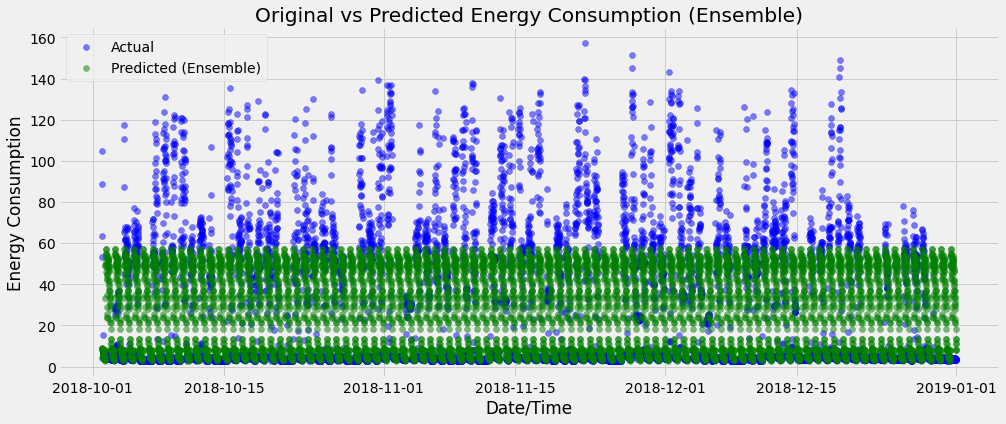

In [63]:
# Plotting the original and ensemble predicted values as a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_ensemble, color='green', label='Predicted (Ensemble)', alpha=0.5)
plt.title('Original vs Predicted Energy Consumption (Ensemble)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


<Figure size 1080x432 with 0 Axes>

Text(0.5, 1.0, 'One Month of Original vs Predicted Energy Consumption (Ensemble)')

Text(0.5, 0, 'Date/Time')

Text(0, 0.5, 'Energy Consumption')

(17836.010416666668, 17866.010416666668)

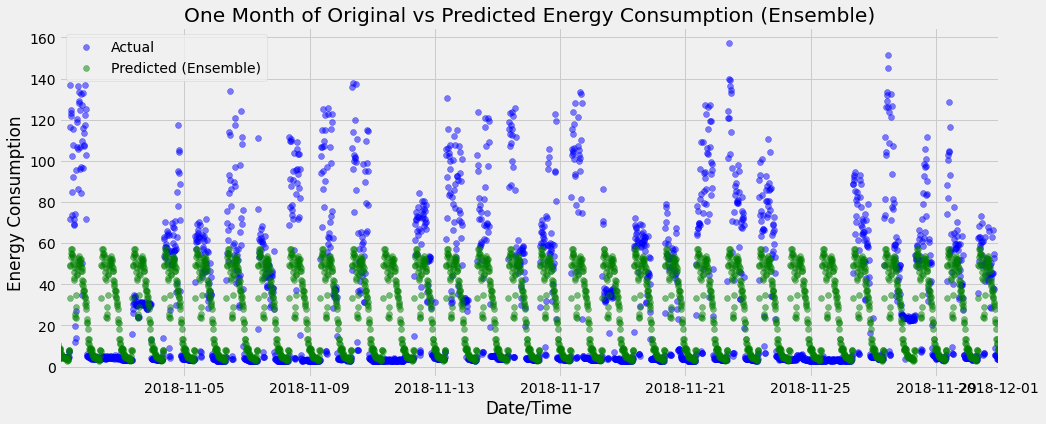

In [65]:
# Assuming y_test.index is a pandas DatetimeIndex
start_date = y_test.index[0]  # Start date of the data
end_date = start_date + pd.Timedelta(days=30)  # End date will be 30 days from start date

# Plotting one month of original and ensemble predicted values as a scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(y_test.index, y_pred_ensemble, color='green', label='Predicted (Ensemble)', alpha=0.5)
plt.title('One Month of Original vs Predicted Energy Consumption (Ensemble)')
plt.xlabel('Date/Time')
plt.ylabel('Energy Consumption')
plt.xlim(start_date, end_date)  # Set x-axis limits to show one month of data
plt.legend()
plt.show()
